In [1]:
# Comando para importar um arquivo:
import cv2
# Carregando a imagem:
imagem = cv2.imread('C:/Users/amdua/OneDrive/Documentos/ArquivosPython/golden-gate.jpg')

In [2]:
imagem.shape

(500, 889, 3)

In [3]:
# Comando para mostrar algumas informações básicas:
print("Altura: {} pixels".format(imagem.shape[0]))
print("Largura: {} pixels".format(imagem.shape[1]))
print("Canais de cores: {}".format(imagem.shape[2]))

Altura: 500 pixels
Largura: 889 pixels
Canais de cores: 3


In [4]:
# Comando para mostrar a imagem:
cv2.imshow('Figura', imagem)
cv2.waitKey(0) # Aguarda uma tecla ser pressionada para fechar a imagem que foi aberta
cv2.destroyAllWindows() # Fecha a janela aberta

In [5]:
# Comando para salvar uma cópia da imagem:
cv2.imwrite('C:/Users/amdua/OneDrive/Documentos/ArquivosPython/golden-gate-opencv.jpg', imagem)

True

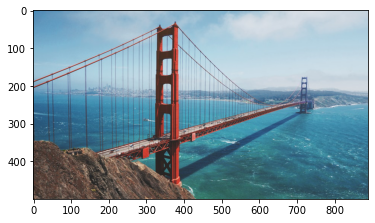

In [6]:
# Comando para mostrar a imagem dentro do Jupiter Notebook:
from matplotlib import pyplot as plt
# IPC: O OpenCV armazena a imagem no formato BGR em vez de RGB, logo, a ordem de posição das cores fica diferente da original.
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) # Comando que reconverte os formatos para repor as cores nos locais certos.
plt.imshow(imagem_rgb)
plt.show()

In [7]:
# Splitting & Merging:

# Carregando a imagem e obtendo cada canal BGR separadamente:
(b, g, r) = cv2.split(imagem)

# Agora, vamos visualizar cada canal em cores separadamente (iremos zerar os canais de outras cores em cada cenário):
import numpy as np
zeros = np.zeros(imagem.shape[:2], dtype = "uint8") # Cria uma matriz de duas dimensões (altura, largura) preenchida de zeros.
cv2.imshow("Vermelho", cv2.merge([zeros, zeros, r]))
cv2.imshow("Verde", cv2.merge([zeros, g, zeros]))
cv2.imshow("Azul", cv2.merge([b, zeros, zeros]))
cv2.waitKey(0)

# Juntando novamente a imagem:
merged = cv2.merge([b, g, r])
cv2.imshow("Merged", merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# Convertendo para escala de cinza:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

cv2.imshow("Figura Cinza", imagem_cinza)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# Conectando as informações de um pixel localizado em determinada posição da imagem:
(b, g, r) = imagem[238, 71]
print('O pixel localizado na posição [238, 71] possui as cores RGB: {}, {}, {}'.format(r, g, b))

O pixel localizado na posição [238, 71] possui as cores RGB: 64, 140, 176


In [10]:
# Mudando o valor de um pixel:
imagem[238, 71] = (52, 229, 14)

(b, g, r) = imagem[238, 71]
print('O pixel localizado na posição [238, 71] possui as cores RGB: {}, {}, {}'.format(r, g, b))

O pixel localizado na posição [238, 71] possui as cores RGB: 14, 229, 52


In [11]:
imagem_pintada = imagem.copy() 
# Precisa usar o comando .copy(), caso contrário, as alterações feitas em imagem_pintada irão impactar a imagem também.
imagem_pintada[82:146, 607:723] = (52, 229, 14)

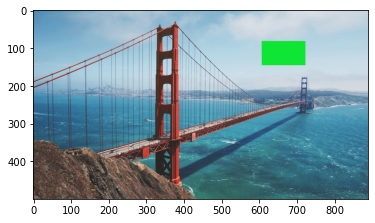

In [12]:
# Comando para pintar/trocar a cor de um trecho desejado da imagem:
imagem_rgb = cv2.cvtColor(imagem_pintada, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb)
plt.show()

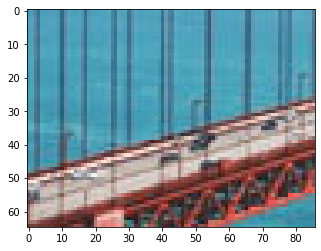

In [13]:
# Comando para selecionar um trecho desejado da imagem e recortar/aproximar:
retangulo = imagem[265:330, 402:488]
imagem_rgb = cv2.cvtColor(retangulo, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb)
plt.show()

In [14]:
# Desenhando imagens com o OpenCV:

import numpy as np

# Inicializando nossa tela como um espaço de pixels 500x500 com 3 canais (RGB):
espaço = np.zeros((500, 500, 3), dtype = "uint8")

# Desenhando uma linha verde do canto superior esquerdo da nossa tela para o canto inferior direito:
verde = (0, 255, 0)
cv2.line(espaço, (0, 0), (500, 500), verde)
cv2.imshow("Figura", espaço)
cv2.waitKey(0)

# Agora, desenhamos uma linha vermelha de 3 pixels de espessura do canto inferior esquerdo para a parte superior direita:
vermelho = (0, 0, 255)
cv2.line(espaço, (500, 0), (0, 500), vermelho, 3)
cv2.imshow("Figura", espaço)
cv2.waitKey(0)

# Desenhamos um quadrado verde de 40x40 pixels, começando em 20x20 e que termina em 60x60:
cv2.rectangle(espaço, (20, 20), (60, 60), verde)
cv2.imshow("Figura", espaço)
cv2.waitKey(0)

# Desenhamos outro retângulo, desta vez vamos torná-lo vermelho e 5 pixels de espessura:
cv2.rectangle(espaço, (10, 150), (100, 300), vermelho, 5)
cv2.imshow("Figura", espaço)
cv2.waitKey(0)

# Vamos desenhar um último retângulo: azul e preenchido
azul = (255, 0, 0)
cv2.rectangle(espaço, (400, 80), (480, 160), azul, -1)
cv2.imshow("Figura", espaço)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# Desenhando um círculo branco no centro da tela com vários círculos ao redor:
espaço = np.zeros((500, 500, 3), dtype = "uint8")
(centro_x, centro_y) = (espaço.shape[1]//2, espaço.shape[0]//2) # Localização x, y do centro do círculo
branco = (255, 255, 255)

for raio in range(0, 250, 25):
    cv2.circle(espaço, (centro_x, centro_y), raio, branco)

cv2.imshow("Figura", espaço)
cv2.waitKey(0)

cv2.destroyAllWindows() 

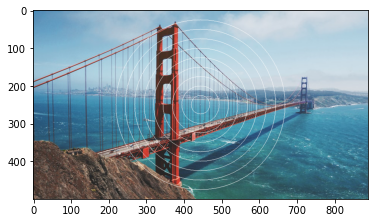

In [16]:
# Desenhando em cima de uma imagem:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
(centro_x, centro_y) = (imagem_rgb.shape[1]//2, imagem_rgb.shape[0]//2) # Localização x, y do centro do círculo
branco = (255, 255, 255)

for raio in range(0, 250, 25):
    cv2.circle(imagem_rgb, (centro_x, centro_y), raio, branco)
    
plt.imshow(imagem_rgb)
plt.show()

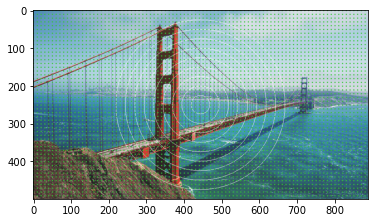

In [17]:
# Outro exemplo de desenho em uma imagem:
for y in range(0, imagem_rgb.shape[0], 10):
    for x in range(0, imagem_rgb.shape[1], 10):
        imagem_rgb[y:y+3, x:x+3] = (50, 200, 50)
plt.imshow(imagem_rgb)
plt.show()

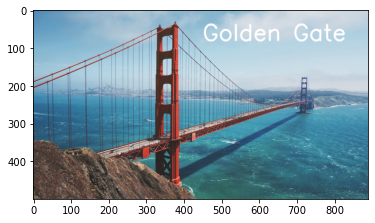

In [18]:
# Desenhando textos em imagens:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
fonte = cv2.FONT_HERSHEY_SIMPLEX # Definindo o tipo de fonte
linha = cv2.LINE_AA # Definindo o formato da linha
cv2.putText(imagem_rgb, 'Golden Gate', (450, 80), fonte, 2, (255,255,255), 3, linha)
# Parâmetros de preenchimento = (imagem, texto, localização_inicial, tipo_fonte, escala_fonte, cor_BGR, espessura, tipo_linha)

plt.imshow(imagem_rgb)
plt.show()

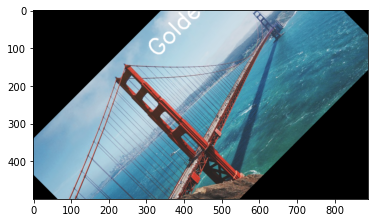

In [19]:
# Rotacionando uma imagem:

# Obtendo as dimensões da imagem e seu centro:
(altura, largura) = imagem_rgb.shape[:2]
centro = (largura//2, altura//2)

# Rotacionando a imagem em 45 Graus:
parametros_rot = cv2.getRotationMatrix2D(centro, 45, 1.0) # (centro, angulo_rotação, escala) - escala é o zoom
rotacionado = cv2.warpAffine(imagem_rgb, parametros_rot, (largura, altura)) # (imagem, parâmetros, dimensões_imagem_saida)
plt.imshow(rotacionado)
plt.show()

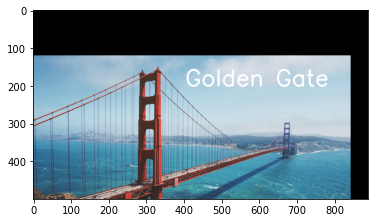

In [20]:
# Deslocando Imagens:

# Obtendo as dimensões da imagem:
(altura, largura) = imagem_rgb.shape[:2]

# Precisa-se especificar quantos pixels deseja-se mover nas direções x e y, dessa forma: [[1, 0, shift_x], [0, 1, shift_y]]
import numpy as np
parametros_shift = np.float32([[1, 0, -46], [0, 1, 120]]) # Movendo 46 pixels para a esquerda e 120 pixels para baixo
deslocado = cv2.warpAffine(imagem_rgb, parametros_shift, (largura, altura)) # (imagem, parâmetros, dimensões_imagem_saida)
plt.imshow(deslocado)
plt.show()